# Introduction to NumPy


> NumPy is an essential Python library. TensorFlow and scikit-learn use NumPy arrays as inputs, and pandas and Matplotlib are built on top of NumPy. In this Introduction to NumPy course, you'll become a master wrangler of NumPy's core object - arrays! 

- toc: true
- branch: master
- badges: true
- comments: true
- author: Hai Nguyen
- categories: [Datacamp, Python, NumPy, Tree Census, Monet array, Array Transformations, Array Mathematics]
- image: images/numpy_intro.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2 
- use_plotly: true

> Using data from New York City's tree census, you'll create, sort, filter, and update arrays. You'll discover why NumPy is so efficient and use broadcasting and vectorization to make your NumPy code even faster. By the end of the course, you'll be using 3D arrays to alter a Claude Monet painting, and you'll understand why such array alterations are essential tools for machine learning.



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:

monthly_sales = np.load('./datasets/monthly_sales.npy')
rgb_array = np.load('./datasets/rgb_array.npy')
sudoku_game = np.load('./datasets/sudoku_game.npy')
sudoku_solution = np.load('./datasets/sudoku_solution.npy')
tree_census = np.load('./datasets/tree_census.npy')




## Understanding NumPy Arrays

> Meet the incredible NumPy array! Learn how to create and change array shapes to suit your needs. Finally, discover NumPy's many data types and how they contribute to speedy array operations.


### Introducing arrays

![](../../images/numpy_intro.png)

![](./images/np_intro.png)


#### Importing NumPy
```python
import numpy as np
```

#### Creating 1D arrays from lists
```python
python_list = [3, 2, 5, 8, 4, 9, 7, 6, 1]
array = np.array(python_list)
array
```
```console
array([3, 2, 5, 8, 4, 9, 7, 6, 1])
```

```python
type(array)
```

```console
numpy.ndarray
```

#### Creating 2D arrays from lists
```python
python_list_of_lists = [[3, 2, 5],
                        [9, 7, 1],
                        [4, 3, 6]]

np.array(python_list_of_lists)
```

```bash
array([ [3, 2, 5],
        [9, 7, 1],
        [4, 3, 6]])
```

#### Python lists
- Can contain many different data types
```python
python_list = ["beep", False, 56, .945, [3, 2, 5]]
```
#### NumPy arrays
- Can contain only a single data type
- Use less space in memory

```python
numpy_boolean_array = [[True, False], [True, True], [False, True]]
numpy_float_array = [1.9, 5.4, 8.8, 3.6, 3.2]
```

#### Creating arrays from scratch
There are many NumPy functions used to create arrays from scratch, including:

- np.zeros()
- np.random.random()
- np.arange()


In [56]:
# Creating arrays: np.zeros()
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [57]:
# Creating arrays: np.random.random()
np.random.random((2, 4))

array([[0.36134839, 0.12657715, 0.83823164, 0.79236976],
       [0.15117285, 0.67954942, 0.73356401, 0.84430255]])

In [58]:
# Creating arrays with np.arange()
display(np.arange(-3, 4))
display(np.arange(4))
display(np.arange(-3, 4, 3))



array([-3, -2, -1,  0,  1,  2,  3])

array([0, 1, 2, 3])

array([-3,  0,  3])

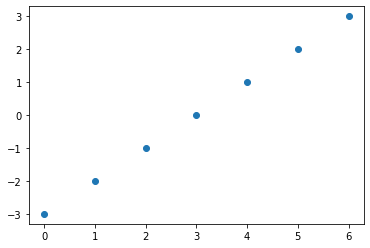

In [59]:
from matplotlib import pyplot as plt
plt.scatter(np.arange(0, 7),
np.arange(-3, 4))
plt.show()

### Your first NumPy array

Once you're comfortable with NumPy, you'll find yourself converting Python lists into NumPy arrays all the time for increased speed and access to NumPy's excellent array methods.

sudoku_list is a Python list containing a sudoku game:
```
[[0, 0, 4, 3, 0, 0, 2, 0, 9],
 [0, 0, 5, 0, 0, 9, 0, 0, 1],
 [0, 7, 0, 0, 6, 0, 0, 4, 3],
 [0, 0, 6, 0, 0, 2, 0, 8, 7],
 [1, 9, 0, 0, 0, 7, 4, 0, 0],
 [0, 5, 0, 0, 8, 3, 0, 0, 0],
 [6, 0, 0, 0, 0, 0, 1, 0, 5],
 [0, 0, 3, 5, 0, 8, 6, 9, 0],
 [0, 4, 2, 9, 1, 0, 3, 0, 0]]
 ```
You're going to change sudoku_list into a NumPy array so you can practice with it in later lessons, for example by creating a 4D array of sudoku games along with their solutions!

Instructions:
- Import NumPy using its generally accepted alias.
- Convert sudoku_list into a NumPy array called sudoku_array.
- Print the class type() of sudoku_array to check that your code has worked properly.



In [60]:
# Import NumPy
import numpy as np

# Convert sudoku_list into an array
sudoku_array = np.array(sudoku_list)

# Print the type of sudoku_array 
print(type(sudoku_array))

<class 'numpy.ndarray'>


Notice that the class of sudoku_array is numpy.ndarray. ndarray is short for N-dimensional array, so-called because a NumPy array can have any number of dimensions.


### Creating arrays from scratch

It can be helpful to know how to create quick NumPy arrays from scratch in order to test your code. For example, when you are doing math with large multi-dimensional arrays, it's nice to check whether the math works as expected on small test arrays before applying your code to the larger arrays. NumPy has many options for creating smaller synthetic arrays.

With this in mind, it's time for you to create some arrays from scratch! numpy is imported for you as np.

Instructions :
- Create and print an array filled with zeros called zero_array, which has two rows and four columns.
- Create and print an array of random floats between 0 and 1 called random_array, which has three rows and six columns.

In [61]:
# Create an array of zeros which has four columns and two rows
zero_array = np.zeros((2, 4))
print(zero_array)

# Create an array of random floats which has six columns and three rows
random_array = np.random.random((3, 6))
print(random_array)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[9.07093422e-01 8.16267291e-01 8.38967143e-01 1.07930438e-01
  5.14451121e-01 7.33586711e-01]
 [5.66738547e-01 6.57982301e-02 8.78486929e-01 6.00783257e-01
  1.28254893e-02 6.04879712e-01]
 [2.27057728e-01 5.65787861e-01 5.04883018e-01 1.31075506e-01
  6.03146552e-01 6.83982050e-04]]


### A range array

np.arange() has especially useful applications in graphing. Your task is to create a scatter plot with the values from doubling_array on the y-axis.
```
doubling_array = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
```
Recall that a scatter plot can be created using the following code:
```
plt.scatter(x_values, y_values)
plt.show()
```
With doubling_array on the y-axis, you now need values for the x-axis, which you can create with np.arange()!

numpy is loaded for you as np, and matplotlib.pyplot is imported as plt.

Instructions:
- Using np.arange(), create a 1D array called one_to_ten which holds all integers from one to ten (inclusive).
- Create a scatterplot with doubling_array as the y values and one_to_ten as the x values.


In [63]:
doubling_array = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

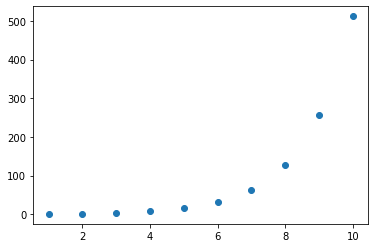

In [64]:
# Create an array of integers from one to ten
one_to_ten = np.arange(1, 11)

# Create your scatterplot
plt.scatter(one_to_ten,doubling_array)
plt.show()

now you know how to make quite a range of arrays! You've also discovered that Pyplot accepts arrays as inputs, which makes sense since Matplotlib is built on top of NumPy.

### Array dimensionality

![](./images/3d.png)

![](./images/4d.png)

![](./images/vector.png)

![](./images/matrix_vs_tensor.png)

Shapeshifting
Array attribute:
```
.shape
```
Array methods:
```
.flatten()
.reshape()
```

In [65]:
# Finding an array's shape
array = np.zeros((3, 5))
print(array)

array.shape

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


(3, 5)

![](./images/row_col.png)

In [68]:
# Flattening an array
array = np.array([[1, 2], 
                  [5, 7], 
                  [6, 6]])
array.flatten()

array([1, 2, 5, 7, 6, 6])

In [69]:
# Reshaping an array
array = np.array([[1, 2], [5, 7], [6, 6]])
array.reshape((2, 3))

array([[1, 2, 5],
       [7, 6, 6]])

In [ ]:
array.reshape((3, 3))
# ValueError: cannot reshape array of size 6 into shape (3,3)


### 3D array creation

In the first lesson, you created a sudoku_game two-dimensional NumPy array. Perhaps you have hundreds of sudoku game arrays, and you'd like to save the solution for this one, sudoku_solution, as part of the same array as its corresponding game in order to organize your sudoku data better. You could accomplish this by stacking the two 2D arrays on top of each other to create a 3D array.

numpy is loaded as np, and the sudoku_game and sudoku_solution arrays are available.

Instructions:
- Create a 3D array called game_and_solution by stacking the two 2D arrays, sudoku_game and sudoku_solution, on top of one another; in the final array, sudoku_game should appear before sudoku_solution.
- Print game_and_solution.


In [76]:
# Create the game_and_solution 3D array
game_and_solution = np.array([sudoku_game,sudoku_solution ])

# Print game_and_solution
print(game_and_solution) 

[[[0 0 5 0 0 9 0 0 1]
  [0 7 0 0 6 0 0 4 3]
  [0 0 6 0 0 2 0 8 7]
  [1 9 0 0 0 7 4 0 0]
  [0 5 0 0 8 3 0 0 0]
  [6 0 0 0 0 0 1 0 5]
  [0 0 3 5 0 8 6 9 0]
  [0 4 2 9 1 0 3 0 0]]

 [[3 2 5 8 4 9 7 6 1]
  [9 7 1 2 6 5 8 4 3]
  [4 3 6 1 9 2 5 8 7]
  [1 9 8 6 5 7 4 3 2]
  [2 5 7 4 8 3 9 1 6]
  [6 8 9 7 3 4 1 2 5]
  [7 1 3 5 2 8 6 9 4]
  [5 4 2 9 1 6 3 7 8]]]


Notice how storing sudoku_game and sudoku_solution in three dimensions makes more sense than adding the data from both to one 2D array.

### The fourth dimension
Printing arrays is a good way to check code output for small arrays like sudoku_game_and_solution, but it becomes unwieldy when dealing with bigger arrays and those with higher dimensions. Another important check is to look at the array's .shape.

Now, you'll create a 4D array that contains two sudoku games and their solutions. numpy is loaded as np. The game_and_solution 3D array you created in the previous example is available, along with new_sudoku_game and new_sudoku_solution.

Instructions:
- Create another 3D array called new_game_and_solution with a different 2D game and 2D solution pair: new_sudoku_game and new_sudoku_solution. new_sudoku_game should appear before new_sudoku_solution.
- Create a 4D array called games_and_solutions by making an array out of the two 3D arrays: game_and_solution and new_game_and_solution, in that order.
- Print the shape of games_and_solutions.

In [79]:
game_and_solution = np.array([  [[0, 0, 4, 3, 0, 0, 2, 0, 9],
                                [0, 0, 5, 0, 0, 9, 0, 0, 1],
                                [0, 7, 0, 0, 6, 0, 0, 4, 3],
                                [0, 0, 6, 0, 0, 2, 0, 8, 7],
                                [1, 9, 0, 0, 0, 7, 4, 0, 0],
                                [0, 5, 0, 0, 8, 3, 0, 0, 0],
                                [6, 0, 0, 0, 0, 0, 1, 0, 5],
                                [0, 0, 3, 5, 0, 8, 6, 9, 0],
                                [0, 4, 2, 9, 1, 0, 3, 0, 0]],

                                [[8, 6, 4, 3, 7, 1, 2, 5, 9],
                                [3, 2, 5, 8, 4, 9, 7, 6, 1],
                                [9, 7, 1, 2, 6, 5, 8, 4, 3],
                                [4, 3, 6, 1, 9, 2, 5, 8, 7],
                                [1, 9, 8, 6, 5, 7, 4, 3, 2],
                                [2, 5, 7, 4, 8, 3, 9, 1, 6],
                                [6, 8, 9, 7, 3, 4, 1, 2, 5],
                                [7, 1, 3, 5, 2, 8, 6, 9, 4],
                                [5, 4, 2, 9, 1, 6, 3, 7, 8]]])
new_sudoku_game = np.array([[0, 0, 4, 3, 0, 0, 0, 0, 0],
                            [8, 9, 0, 2, 0, 0, 6, 7, 0],
                            [7, 0, 0, 9, 0, 0, 0, 5, 0],
                            [5, 0, 0, 0, 0, 8, 1, 4, 0],
                            [0, 7, 0, 0, 3, 2, 0, 6, 0],
                            [6, 0, 0, 0, 0, 1, 3, 0, 8],
                            [0, 0, 1, 7, 5, 0, 9, 0, 0],
                            [0, 0, 5, 0, 4, 0, 0, 1, 2],
                            [9, 8, 0, 0, 0, 6, 0, 0, 5]])

new_sudoku_solution = np.array([[2, 5, 4, 3, 6, 7, 8, 9, 1],
                                [8, 9, 3, 2, 1, 5, 6, 7, 4],
                                [7, 1, 6, 9, 8, 4, 2, 5, 3],
                                [5, 3, 2, 6, 9, 8, 1, 4, 7],
                                [1, 7, 8, 4, 3, 2, 5, 6, 9],
                                [6, 4, 9, 5, 7, 1, 3, 2, 8],
                                [4, 2, 1, 7, 5, 3, 9, 8, 6],
                                [3, 6, 5, 8, 4, 9, 7, 1, 2],
                                [9, 8, 7, 1, 2, 6, 4, 3, 5]])

In [80]:
# Create a second 3D array of another game and its solution 
new_game_and_solution = np.array([new_sudoku_game , new_sudoku_solution])

# Create a 4D array of both game and solution 3D arrays
games_and_solutions = np.array([game_and_solution , new_game_and_solution])

# Print the shape of your 4D array
print(games_and_solutions.shape)

(2, 2, 9, 9)


Notice how storing sudoku_game and sudoku_solution in three dimensions makes more sense than adding the data from both to one 2D array.

### Flattening and reshaping


### NumPy data types
### The dtype argument
### Anticipating data types
### A smaller sudoku game

## Selecting and Updating Data

> Sharpen your NumPy data wrangling skills by slicing, filtering, and sorting New York City’s tree census data. Create new arrays by pulling data based on conditional statements, and add and remove data along any dimension to suit your purpose. Along the way, you’ll learn the shape and dimension compatibility principles to prepare for super-fast array math.


### Indexing and slicing arrays



### Slicing and indexing trees


### Stepping into 2D


### Sorting trees


### Filtering arrays

### Filtering with masks
In the last lesson, you sorted trees from smallest to largest. Now, you'll use fancy indexing to return the row of data representing the largest tree in tree_census. You'll also examine other trees located on the same block as the largest tree: are they also large?

numpy is loaded as np, and the tree_census array is available. As a reminder, the tree_census columns in order refer to a tree's ID, its block ID, its trunk diameter, and its stump diameter.

Instructions:
- Using Boolean indexing, create an array, largest_tree_data, which contains the row of data on the largest tree in tree_census corresponding to the tree with a diameter of 51.
- Slice largest_tree_data to retrieve only the block id of the block the largest tree is located on; save this block id as largest_tree_block_id.
- Using fancy indexing, create an array called trees_on_largest_tree_block which contains data on all trees with the same block ID as the largest tree.

In [8]:
# Create an array which contains row data on the largest tree in tree_census
largest_tree_data = tree_census[tree_census[:, 2] == 51]
print(largest_tree_data)

# Slice largest_tree_data to get only the block ID
largest_tree_block_id = largest_tree_data[:, 1]
print(largest_tree_block_id)

# Create an array which contains row data on all trees with largest_tree_block_id
trees_on_largest_tree_block = tree_census[tree_census[:, 1] == largest_tree_block_id]
print(trees_on_largest_tree_block)

[[    61 501882     51      0]]
[501882]
[[    60 501882      8      0]
 [    61 501882     51      0]
 [    62 501882      7      0]
 [    63 501882      4      0]
 [    64 501882     15      0]
 [    65 501882      3      0]
 [    66 501882      8      0]
 [    67 501882      6      0]
 [    68 501882      6      0]
 [    69 501882      3      0]]


Based on your work, it looks like the largest tree on the tree_census is the only really big tree on its block.

### Fancy indexing vs. np.where()

ou and your tree research team are double-checking collection data by visiting a few trees in person to confirm their measurements. You've been assigned to check the data for trees on block 313879, and you'd like to make a small array of just the tree data that relates to your work.

numpy is loaded as np, and the tree_census array is available. As a reminder, the tree_census columns in order refer to a tree's ID, its block ID, its trunk diameter, and its stump diameter.

Instructions:
- Using fancy indexing, create an array called block_313879 which only contains data for trees with a block ID of 313879.



In [9]:
# Create the block_313879 array containing trees on block 313879
block_313879 = tree_census[tree_census[:, 1] ==  313879]
print(block_313879)

[[  1115 313879      3      0]
 [  1116 313879     17      0]]


- Using np.where(), create an array of row_indices for trees with a block ID of 313879.
- Using row_indices, create block_313879, which contains data for trees on block 313879.

In [10]:
# Create an array of row_indices for trees on block 313879
row_indices = np.where(tree_census[:,1] == 313879)

# Create an array which only contains data for trees on block 313879
block_313879 = tree_census[row_indices]
print(block_313879)

[[  1115 313879      3      0]
 [  1116 313879     17      0]]


Great filtering. You probably noticed that fancy indexing is more elegant than np.where() in this example. That's because we haven't really tapped into the power of np.where() yet. It's most useful for finding indices and then using that location information to update an array. We'll see an example of this in the next exercise, and also in the next lesson, where one of the functions takes indices as arguments!


### Creating arrays from conditions

Currently, the stump diameter and trunk diameter values in tree_census are in two different columns. Living trees have a stump diameter of zero while stumps have a trunk diameter of zero. If you'd like to include both living trees and stumps in certain research calculations, it might be useful to have their diameters together in just one column.

numpy is loaded as np, and the tree_census array is available. As a reminder, the tree census columns in order refer to a tree's ID, its block ID, its trunk diameter, and its stump diameter.

Instructions:
- Create and print a 1D array called trunk_stump_diameters, which replaces a tree's trunk diameter with its stump diameter if the trunk diameter is zero.



In [11]:
# Create and print a 1D array of tree and stump diameters
trunk_stump_diameters = np.where(tree_census[:,2] == 0,tree_census[:,3], tree_census[:,2] )
print(trunk_stump_diameters)

[24 20  3  3  4  4  4  4  4  3  3  4  2  2  3  4  4  4  3 14  3  4  7  8
  7  8  7  5  6  5  5 17 31 19 21 18  4  5  3  4  3  4 13 13 13  5  4  4
  4 11  5  4  5  8 51  7  4 15  3  8  6  6  3  4  3  2  3  3  6  5  5  5
  5  9  4  4  7  7  6  5  4  4  5  5  5  7  3  5  3  3  6  6  8  7  4  5
  4  4  4  4  6  5  3  4 12 12 12  5  6  6  6  6  6  5  5  6  7  7 25  5
  5  4  6  6  7 11  6 17 13 14 14 20 15 13  7  7 10 17 14  4  6  7  8  7
  7  6  7  5  2  2  2  2 26 25  2 15  6 20  5  9 15 13 15  3  2 13  6 12
 15 18 22 18 18 15 17  7  3  7  8  4 12 11 12  3  9 12 11 10  8  6  6  7
  7  3 15 12 12  4  5  5  5  4  4  5  4  9  2  4  4  6  5  5  2  5  5  4
  4  5  5  6 11  4  5  7  3 14 11 10  7 15 10  5  6 10 10  6  5  4  4  3
  5  4 14 12 11  8 14 12  9 12 11  7  8 10 10 12 11 12  5  5  6  9  9  8
  5  5  5  6  6 12 12 11 12  8  9  5  5  5  8  2  2  2 14 18 14 14 22 15
 19 14 18  7  7  7  8  8  5 10 14  2  2  2  2 11 12 12  3  3  3  3  3  6
  6  8  2  2 11 11 11  9 11 12 13  9 11  6  4  5  5

But this is just a 1D array without any tree or block ID information. How do we add this information back to the tree_census array? That's the subject of our next lesson!


### Adding and removing data

![](./images/numpy_concat.png)

#### Concatenating Rows
- np.concatenate() concatenates along the first axis by default

In [13]:
classroom_ids_and_sizes = np.array([[1, 22], [2, 21], [3, 27], [4, 26]])
new_classrooms = np.array([[5, 30], [5, 17]])
np.concatenate((classroom_ids_and_sizes, new_classrooms))

array([[ 1, 22],
       [ 2, 21],
       [ 3, 27],
       [ 4, 26],
       [ 5, 30],
       [ 5, 17]])

#### Concatenating columns
- Specify the ```axis = 1```

In [19]:
classroom_ids_and_sizes = np.array([[1, 22], [2, 21], [3, 27], [4, 26]])
grade_levels_and_teachers = np.array([[1, "James"], [1, "George"], [3,"Amy"],[3, "Meehir"]])
classroom_data = np.concatenate((classroom_ids_and_sizes, grade_levels_and_teachers), axis=1)
classroom_data

array([['1', '22', '1', 'James'],
       ['2', '21', '1', 'George'],
       ['3', '27', '3', 'Amy'],
       ['4', '26', '3', 'Meehir']], dtype='<U11')

![](./images/np_shape.png)

![](./images/np_dimension.png)

In [16]:
# Creating compatibility
array_1D = np.array([1, 2, 3])
column_array_2D = array_1D.reshape((3, 1))
display(column_array_2D)

row_array_2D = array_1D.reshape((1, 3))
display(row_array_2D)

array([[1],
       [2],
       [3]])

array([[1, 2, 3]])

![](./images/np_dimension2.png)

In [20]:
classroom_data

array([['1', '22', '1', 'James'],
       ['2', '21', '1', 'George'],
       ['3', '27', '3', 'Amy'],
       ['4', '26', '3', 'Meehir']], dtype='<U11')

#### Deleting with np.delete()

In [21]:
np.delete(classroom_data, 1, axis=0)

array([['1', '22', '1', 'James'],
       ['3', '27', '3', 'Amy'],
       ['4', '26', '3', 'Meehir']], dtype='<U11')

#### Deleting columns


In [22]:
np.delete(classroom_data, 1, axis=1)

array([['1', '1', 'James'],
       ['2', '1', 'George'],
       ['3', '3', 'Amy'],
       ['4', '3', 'Meehir']], dtype='<U11')

#### Deleting without an axis
- Numpy will delete at the index of the flatten version of the array.

In [26]:
classroom_data

array([['1', '22', '1', 'James'],
       ['2', '21', '1', 'George'],
       ['3', '27', '3', 'Amy'],
       ['4', '26', '3', 'Meehir']], dtype='<U11')

In [27]:
np.delete(classroom_data, 1)

array(['1', '1', 'James', '2', '21', '1', 'George', '3', '27', '3', 'Amy',
       '4', '26', '3', 'Meehir'], dtype='<U11')

### Adding rows

The research team has discovered two trees that were left off the tree_census. Your task is to add rows containing the data for these new trees to the end of the tree_census array. The new trees' data is saved in a 2D array called new_trees:

numpy is loaded as np, and the tree_census and new_trees arrays are available.

Instructions:
- Add rows to the end of tree_census containing data for the new trees from the new_trees 2D array; save the new array as updated_tree_census.


In [29]:
new_trees = np.array([[1211, 227386, 20, 0], [1212, 227386, 8, 0]])

In [30]:
# Print the shapes of tree_census and new_trees
print(tree_census.shape, new_trees.shape)

# Add rows to tree_census which contain data for the new trees
updated_tree_census = np.concatenate((tree_census, new_trees))
print(updated_tree_census)

(1000, 4) (2, 4)
[[     3 501451     24      0]
 [     4 501451     20      0]
 [     7 501911      3      0]
 ...
 [  1210 227386      6      0]
 [  1211 227386     20      0]
 [  1212 227386      8      0]]


### Adding columns

You finished the last set of exercises by creating an array called trunk_stump_diameters, which combined data from the trunk diameter and stump diameter columns into a 1D array. Now, you'll add that 1D array as a column to the tree_census array.

numpy is loaded as np, and both the tree_census and trunk_stump_diameters arrays are available.

Instructions:
- Print the shapes of both tree_census and trunk_stump_diameters.
- Reshape trunk_stump_diameters so that it can be appended as the last column in tree_census; call the reshaped array reshaped_diameters.
- Concatenate reshaped_diameters to the end of tree_census so that it becomes the last column; call the new array concatenated_tree_census.

In [32]:
# Print the shapes of tree_census and trunk_stump_diameters
print(trunk_stump_diameters.shape, tree_census.shape)

# Reshape trunk_stump_diameters
reshaped_diameters = trunk_stump_diameters.reshape((1000, 1))

# Concatenate reshaped_diameters to tree_census as the last column
concatenated_tree_census = np.concatenate((tree_census, reshaped_diameters), axis = 1)
print(concatenated_tree_census)

(1000,) (1000, 4)
[[     3 501451     24      0     24]
 [     4 501451     20      0     20]
 [     7 501911      3      0      3]
 ...
 [  1198 227387     11      0     11]
 [  1199 227387     11      0     11]
 [  1210 227386      6      0      6]]


That's right! Adding a 1D array to an existing 2D array requires you to reshape the 1D array into a 2D array first. We'll dive into shape compatibility issues like this even further in the next chapter on array mathematics!

### Deleting with np.delete()

What if your tree research focuses only on living trees on publicly-owned city blocks? It might be helpful to delete some unneeded data like the stump diameter column and some trees located on private blocks.

You've learned that NumPy's np.delete() function takes three arguments: the original array, the index or indices to be deleted, and the axis to delete along. If you don't know the index or indices of the array you'd like to delete, recall that when it is only passed one argument,np.where() returns an array of indices where a condition is met!

numpy is loaded as np, and the tree_census 2D array is available. The columns in order refer to a tree's ID, block number, trunk diameter, and stump diameter.

Instructions:
- Delete the stump diameter column from tree_census, and save the new 2D array as tree_census_no_stumps.
- Using np.where(), find the indices of any trees on block 313879, a private block. Save the indices in an array called private_block_indices.
- Using the indices you just found using np.where(), delete the rows for trees on block 313879 from tree_census_no_stumps, saving the new 2D array as tree_census_clean.
- Print the shape of tree_census_clean.

In [34]:
# Delete the stump diameter column from tree_census
tree_census_no_stumps = np.delete(tree_census, 3, axis=1)

# Save the indices of the trees on block 313879
private_block_indices = np.where(tree_census[:,1] == 313879)

# Delete the rows for trees on block 313879 from tree_census_no_stumps
tree_census_clean = np.delete(tree_census_no_stumps, private_block_indices, axis=0)

# Print the shape of tree_census_clean
print(tree_census_clean.shape)

(998, 3)


We can't stump you! Notice that the new shape reflects two fewer rows and one fewer column than tree_census started with because of your deletions: just as expected.

## Array Mathematics!

> Leverage NumPy’s speedy vectorized operations to gather summary insights on sales data for American liquor stores, restaurants, and department stores. Vectorize Python functions for use in your NumPy code. Finally, use broadcasting logic to perform mathematical operations between arrays of different sizes.


### Summarizing data

#### Aggregating methods

- ```.sum()```
- ```.min()```
- ```.max()```
- ```.mean()```
- ```.cumsum()```

![](./images/summarizing1.png)





#### Summing data

![](./images/summarizing1.png)

In [36]:
security_breaches = np.array([[0, 5, 1],
                              [0, 2, 0],
                              [1, 1, 2],
                              [2, 2, 1],
                              [0, 0, 0]])

security_breaches.sum()

17

#### Aggregating Rows

![](./images/summarizing3.png)

In [40]:
security_breaches.sum(axis=0)

array([ 3, 10,  4])

#### Aggregating columns

![](./images/summarizing4.png)

In [39]:
security_breaches.sum(axis=1)

array([6, 2, 4, 5, 0])

![](./images/summarizing5.png)


#### Minimum and maximum values

![](./images/summarizing6.png)

In [41]:
display(security_breaches.min())
display(security_breaches.max())
display(security_breaches.min(axis=1))

0

5

array([0, 0, 1, 1, 0])

#### Finding the mean

In [45]:
print(security_breaches.mean())
display(security_breaches.mean(axis=1))

1.1333333333333333


array([2.        , 0.66666667, 1.33333333, 1.66666667, 0.        ])

#### The keepdims argument


In [47]:
display(security_breaches.sum(axis=1))
display(security_breaches.sum(axis=1, keepdims=True)) # keep the dimension, already is the 2D array.

array([6, 2, 4, 5, 0])

array([[6],
       [2],
       [4],
       [5],
       [0]])

#### Cumulative sums

![](./images/cummulative_sum.png)

In [48]:
security_breaches.cumsum(axis=0)

array([[ 0,  5,  1],
       [ 0,  7,  1],
       [ 1,  8,  3],
       [ 3, 10,  4],
       [ 3, 10,  4]])

#### Graphing summary values

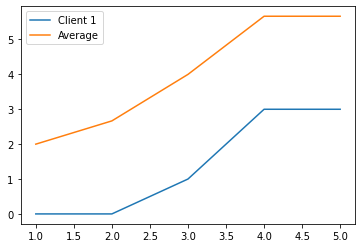

In [52]:
cum_sums_by_client = security_breaches.cumsum(axis=0)
plt.plot(np.arange(1, 6), cum_sums_by_client[:, 0], label="Client 1")
plt.plot(np.arange(1, 6), cum_sums_by_client.mean(axis=1), label="Average")
plt.legend()
plt.show()

### Sales totals

The dataset you'll be working with during this chapter is one year's sales data by month for three different industries. Each row in this monthly_sales array represents a month from January to December. The first column has monthly sales data for liquor stores, the second column has data for restaurants, and the last column tracks sales for department stores.

```
array([[ 4134, 23925,  8657],
       [ 4116, 23875,  9142],
       [ 4673, 27197, 10645],
       [ 4580, 25637, 10456],
       [ 5109, 27995, 11299],
       [ 5011, 27419, 10625],
       [ 5245, 27305, 10630],
       [ 5270, 27760, 11550],
       [ 4680, 24988,  9762],
       [ 4913, 25802, 10456],
       [ 5312, 25405, 13401],
       [ 6630, 27797, 18403]])
```

Your task is to create an array with all the information from monthly_sales as well as a fourth column which totals the monthly sales across industries for each month.

numpy is loaded for you as np, and the monthly_sales array is available.

Instructions:
- Create a 2D array which contains a single column of total monthly sales across industries; call it monthly_industry_sales.
- Concatenate monthly_industry_sales with monthly_sales into a new array called monthly_sales_with_total, with the monthly cross-industry sales information in the final column.

In [53]:
# Create a 2D array of total monthly sales across industries
monthly_industry_sales = monthly_sales.sum(axis=1, keepdims=True)
print(monthly_industry_sales)

# Add this column as the last column in monthly_sales
monthly_sales_with_total = np.concatenate((monthly_sales, monthly_industry_sales), axis = 1)
print(monthly_sales_with_total)

[[36716]
 [37133]
 [42515]
 [40673]
 [44403]
 [43055]
 [43180]
 [44580]
 [39430]
 [41171]
 [44118]
 [52830]]
[[ 4134 23925  8657 36716]
 [ 4116 23875  9142 37133]
 [ 4673 27197 10645 42515]
 [ 4580 25637 10456 40673]
 [ 5109 27995 11299 44403]
 [ 5011 27419 10625 43055]
 [ 5245 27305 10630 43180]
 [ 5270 27760 11550 44580]
 [ 4680 24988  9762 39430]
 [ 4913 25802 10456 41171]
 [ 5312 25405 13401 44118]
 [ 6630 27797 18403 52830]]


Those are sum good-looking arrays! Notice how using the keepdims keyword is helpful not only for dimension compatibility but also for visualizing which axis your aggregating data originates from!

### Plotting averages

Perhaps you have a hunch that department stores see greater increased sales than average during the end of the year as people rush to buy gifts. You'd like to test this theory by comparing monthly department store sales to average sales across all three industries.

numpy is loaded for you as np, and the monthly_sales array is available. The monthly_sales columns in order refer to liquor store, restaurant, and department store sales.

Instructions:
- Plot an array of the numbers one through twelve (representing each month) on the x-axis and avg_monthly_sales on the y-axis.
- Plot an array of the numbers one through twelve on the x-axis and the department store sales column of monthly_sales on the y-axis.


[12238.66666667 12377.66666667 14171.66666667 13557.66666667
 14801.         14351.66666667 14393.33333333 14860.
 13143.33333333 13723.66666667 14706.         17610.        ]


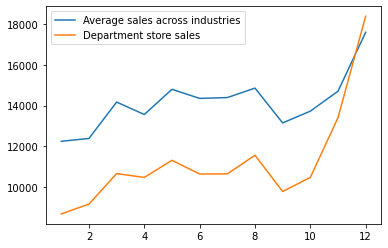

In [54]:
# Create the 1D array avg_monthly_sales
avg_monthly_sales = monthly_sales.mean(axis=1)
print(avg_monthly_sales)

# Plot avg_monthly_sales by month
plt.plot(np.arange(1,13), avg_monthly_sales, label="Average sales across industries")

# Plot department store sales by month
plt.plot(np.arange(1,13), monthly_sales[:,2], label="Department store sales")
plt.legend()
plt.show()

Based on your work, it does look like department store sales are even greater than the average sales across three industries with heavy end-of-year sales—at least in December!

### Cumulative sales

In the last exercise, you established that December is a big month for department stores. Are there other months where sales increase or decrease significantly?

Your task now is to look at monthly cumulative sales for each industry. The slope of the cumulative sales line will explain a lot about how steady sales are over time: a straight line will indicate steady growth, and changes in slope will indicate relative increases or decreases in sales.

numpy is loaded for you as np, and the monthly_sales array is available. The monthly_sales columns in order refer to liquor store, restaurant, and department store sales.

Instructions:
- Find cumulative monthly sales for each industry, saving this data in an array called cumulative_monthly_industry_sales.
- Plot each industry's cumulative sales by month as separate lines, with cumulative sales on the y-axis and month number on the x-axis.

[[  4134  23925   8657]
 [  8250  47800  17799]
 [ 12923  74997  28444]
 [ 17503 100634  38900]
 [ 22612 128629  50199]
 [ 27623 156048  60824]
 [ 32868 183353  71454]
 [ 38138 211113  83004]
 [ 42818 236101  92766]
 [ 47731 261903 103222]
 [ 53043 287308 116623]
 [ 59673 315105 135026]]


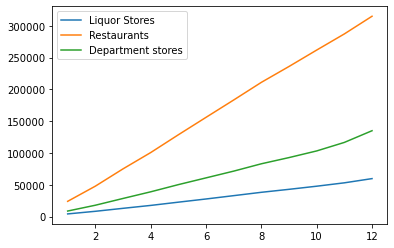

In [55]:
# Find cumulative monthly sales for each industry
cumulative_monthly_industry_sales = monthly_sales.cumsum(axis=0)
print(cumulative_monthly_industry_sales)

# Plot each industry's cumulative sales by month as separate lines
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,0], label="Liquor Stores")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,1], label="Restaurants")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,2], label="Department stores")
plt.legend()
plt.show()

Nice work! Your graph indicates that sales for both restaurants and liquor stores are fairly steady throughout the year. The biggest sales growth is the growth you identified in the previous task: department store sales increase towards the end of the year.


### Vectorized operations

### Tax calculations

### Projecting sales
### Vectorizing .upper()

### Broadcasting

### Broadcastable or not?

### Broadcasting across columns
### Broadcasting across rows

## Array Transformations

NumPy meets the art world in this final chapter as we use image data from a Monet masterpiece to explore how you can use to augment image data. You’ll use flipping and transposing functionality to quickly transform our masterpiece. Next, you’ll pull the Monet array apart, make changes, and reconstruct it using array stacking to see the results.


### Saving and loading arrays

### Loading .npy files

### Getting help

### Update and save

### Array acrobatics

### Augmenting Monet

### Transposing your masterpiece

### Stacking and splitting

### 2D split and stack

### Splitting RGB data

### Stacking RGB data

### Congratulations!
